## Project 2


In [57]:

import pandas as pd
import numpy as np
import itertools
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [58]:
# read in the data to dataframe called heat
heat = pd.read_csv(" https://webpages.charlotte.edu/mschuck1/classes/DTSC2301/Data/DTSC2301_Project2.csv", na_values=['?'])
heat.head()

,RelCompactness,SurfaceArea,WallArea,RoofArea,OverallHgt,Orientation,GlazingArea,GlazingAreaDist,HeatingLoad
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84


In [59]:
heat.shape

(1296, 9)

In [60]:
heat.isnull().sum()

RelCompactness     528
SurfaceArea        528
WallArea           528
RoofArea           528
OverallHgt         528
Orientation        528
GlazingArea        528
GlazingAreaDist    528
HeatingLoad        528
dtype: int64

In [61]:

# replace the ? in the data with NaN for missing values
heat.replace([' ?'],np.nan)
heat = heat.dropna()
heat.isnull().sum()

RelCompactness     0
SurfaceArea        0
WallArea           0
RoofArea           0
OverallHgt         0
Orientation        0
GlazingArea        0
GlazingAreaDist    0
HeatingLoad        0
dtype: int64

In [62]:
heat.shape

(768, 9)

In [63]:

# show information about the dataframe
heat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RelCompactness   768 non-null    float64
 1   SurfaceArea      768 non-null    float64
 2   WallArea         768 non-null    float64
 3   RoofArea         768 non-null    float64
 4   OverallHgt       768 non-null    float64
 5   Orientation      768 non-null    float64
 6   GlazingArea      768 non-null    float64
 7   GlazingAreaDist  768 non-null    float64
 8   HeatingLoad      768 non-null    float64
dtypes: float64(9)
memory usage: 60.0 KB


In [64]:

heat = heat.dropna()
# show information about the dataframe
heat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RelCompactness   768 non-null    float64
 1   SurfaceArea      768 non-null    float64
 2   WallArea         768 non-null    float64
 3   RoofArea         768 non-null    float64
 4   OverallHgt       768 non-null    float64
 5   Orientation      768 non-null    float64
 6   GlazingArea      768 non-null    float64
 7   GlazingAreaDist  768 non-null    float64
 8   HeatingLoad      768 non-null    float64
dtypes: float64(9)
memory usage: 60.0 KB


In [65]:
X1 = heat[['RelCompactness', 'WallArea', 'RoofArea', 'Orientation', 'GlazingAreaDist']]  
y = heat['HeatingLoad']

In [66]:
# Create a linear regression model
heatload_model = LinearRegression()

# Fit the model on the data
heatload_model.fit(X1, y)

# Make predictions on the data
y_hat1 = heatload_model.predict(X1)
# Evaluate the model performance (RMSE)
rmse1 = np.sqrt(mean_squared_error(y, y_hat1))
print('Root Mean Squared Error:', rmse1)

# Get the coefficients and intercept
print('Coefficients:', heatload_model.coef_)
print('Intercept:', heatload_model.intercept_)

Root Mean Squared Error: 4.117016865772242
Coefficients: [-1.45943689e+02 -1.25587360e-01 -5.24955361e-01 -2.33281250e-02
  5.68393970e-01]
Intercept: 265.0244214354581


In [67]:
# fit the model
model = sm.OLS(y, sm.add_constant(X1))
regr = model.fit()
regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            HeatingLoad   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     761.8
Date:                Mon, 24 Feb 2025   Prob (F-statistic):          1.54e-293
Time:                        11:27:30   Log-Likelihood:                -2176.6
No. Observations:                 768   AIC:                             4365.
Df Residuals:                     762   BIC:                             4393.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             265.0244     17.570     15.084      0.000     230.534     299.515
RelCompactness   -145.9437     11.144    -13.097      0.000    -167.819    -124.068
WallArea           -0.1256      0.014     -8.978      0.000      -0.153      -0.098
RoofArea           -0.5250      0.027    -19.649      0.000      -0.577      -0.473
Orientation        -0.0233      0.133     -0.175      0.861      -0.285       0.239
GlazingAreaDist     0.5684      0.096      5.907      0.000       0.379       0.757
==============================================================================
Omnibus:                       17.608   Durbin-Watson:                   0.431
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.805
Skew:                           0.151   Prob(JB):                     3.37e-07
Kurtosis:                       3.917   Cond. No.                     5.10e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
# create interaction terms with Orientation and WallArea
heat['OrientationWallArea'] = heat['Orientation'] * heat['WallArea']

# fit the model
model = sm.OLS(y, sm.add_constant(heat[['RelCompactness', 'WallArea', 'RoofArea', 'Orientation', 'GlazingAreaDist', 'OrientationWallArea']]))
regr = model.fit()
regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            HeatingLoad   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     634.0
Date:                Mon, 24 Feb 2025   Prob (F-statistic):          4.46e-292
Time:                        11:27:30   Log-Likelihood:                -2176.6
No. Observations:                 768   AIC:                             4367.
Df Residuals:                     761   BIC:                             4400.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 265.2682     17.909     14.812      0.000     230.111     300.426
RelCompactness       -145.9437     11.151    -13.088      0.000    -167.834    -124.054
WallArea               -0.1264      0.018     -7.167      0.000      -0.161      -0.092
RoofArea               -0.5250      0.027    -19.636      0.000      -0.577      -0.472
Orientation            -0.0930      0.984     -0.094      0.925      -2.025       1.839
GlazingAreaDist         0.5684      0.096      5.903      0.000       0.379       0.757
OrientationWallArea     0.0002      0.003      0.071      0.943      -0.006       0.006
==============================================================================
Omnibus:                       17.606   Durbin-Watson:                   0.430
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.805
Skew:                           0.150   Prob(JB):                     3.37e-07
Kurtosis:                       3.917   Cond. No.                     1.73e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
#print(heat.columns)
heat_df=heat[['RelCompactness','SurfaceArea','WallArea','OverallHgt','RoofArea','Orientation','GlazingArea','GlazingAreaDist']]

In [70]:
X=heat_df
y=heat['HeatingLoad']

In [71]:
# create a function called processSubset to fit the models and return information about
# the model as well as the RMSE
def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    #X=sm.add_constant(X[list(feature_set)])
    model = sm.OLS(y,sm.add_constant(X[list(feature_set)]))
    regr = model.fit()
    RMSE = np.sqrt(((regr.predict(sm.add_constant(X[list(feature_set)])) - y) ** 2).mean())
    return {"model":regr, "RMSE":RMSE}

In [72]:
def getBest(k):
    # start tracking the time 
    tic = time.time()
    # create an array to put the results
    results = []
    
    # do all combinations of predictors 
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the smallest RMSE
    best_model = models.loc[models['RMSE'].argmin()]
    
    # stop tracking the time
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [73]:
# Could take quite awhile to complete...

models_best = pd.DataFrame(columns=["RMSE", "model"])

tic = time.time()
for i in range(0,9):
    models_best.loc[i] = getBest(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed 1 models on 0 predictors in 0.007709980010986328 seconds.
Processed 8 models on 1 predictors in 0.06606435775756836 seconds.
Processed 28 models on 2 predictors in 0.16506528854370117 seconds.
Processed 56 models on 3 predictors in 0.5641300678253174 seconds.
Processed 70 models on 4 predictors in 0.8710074424743652 seconds.
Processed 56 models on 5 predictors in 0.6973650455474854 seconds.
Processed 28 models on 6 predictors in 0.3937077522277832 seconds.
Processed 8 models on 7 predictors in 0.15317273139953613 seconds.
Processed 1 models on 8 predictors in 0.020887136459350586 seconds.
Total elapsed time: 2.971790075302124 seconds.


In [74]:
models_best

,RMSE,model
0,10.083624,<statsmodels.regression.linear_model.Regressio...
1,4.608923,<statsmodels.regression.linear_model.Regressio...
2,3.720009,<statsmodels.regression.linear_model.Regressio...
3,3.027299,<statsmodels.regression.linear_model.Regressio...
4,2.94357,<statsmodels.regression.linear_model.Regressio...
5,2.92735,<statsmodels.regression.linear_model.Regressio...
6,2.919111,<statsmodels.regression.linear_model.Regressio...
7,2.918994,<statsmodels.regression.linear_model.Regressio...
8,2.918994,<statsmodels.regression.linear_model.Regressio...


In [75]:
# here is the best model with 2 predictors is counted as a predictor
print(models_best.loc[2, "model"].summary())

                            OLS Regression Results                            
Dep. Variable:            HeatingLoad   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     2428.
Date:                Mon, 24 Feb 2025   Prob (F-statistic):               0.00
Time:                        11:27:33   Log-Likelihood:                -2098.7
No. Observations:                 768   AIC:                             4203.
Df Residuals:                     765   BIC:                             4217.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -9.3890      0.487    -19.288      

In [76]:
# Show the best 8-variable model 
print(getBest(8)["model"].summary())

Processed 1 models on 8 predictors in 0.026913881301879883 seconds.
                            OLS Regression Results                            
Dep. Variable:            HeatingLoad   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     1187.
Date:                Mon, 24 Feb 2025   Prob (F-statistic):               0.00
Time:                        11:27:33   Log-Likelihood:                -1912.5
No. Observations:                 768   AIC:                             3841.
Df Residuals:                     760   BIC:                             3878.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

In [77]:
models_best.loc[5, "model"].rsquared

0.9157216505746987

In [78]:
# Gets the second element from each row ('model') and pulls out its rsquared attribute
models_best.apply(lambda row: row[1].rsquared, axis=1)

/tmp/ipykernel_5036/3287597919.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  models_best.apply(lambda row: row[1].rsquared, axis=1)


0    0.000000
1    0.791087
2    0.863901
3    0.909868
4    0.914785
5    0.915722
6    0.916195
7    0.916202
8    0.916202
dtype: float64

As expected, the $r^2$ statistic increases monotonically as more
variables are included.  This happens even if the added predictor has little value; that's 
part of the reason that we introduced $r^2_{adj}$.

Plotting RSS, adjusted $r^2$, AIC, and BIC for all of the models at once will
help us decide which model to select. 

Akaike's Information Criterion (AIC) and Bayesian Information Criterion (BIC) are two other metrics for penalizing extra terms in a model.  While $r^2_{adj}$ works well for regression,
AIC and BIC are more general for a larger class of models.  For both AIC and BIC we want the smallest values we can get. 

/tmp/ipykernel_5036/1196503365.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)
/tmp/ipykernel_5036/1196503365.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aic = models_best.apply(lambda row: row[1].aic, axis=1)
/tmp/ipykernel_5036/1196503365.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bic = models_best.apply(lambda row: row[1].bic, axis=1

Text(0, 0.5, 'BIC')

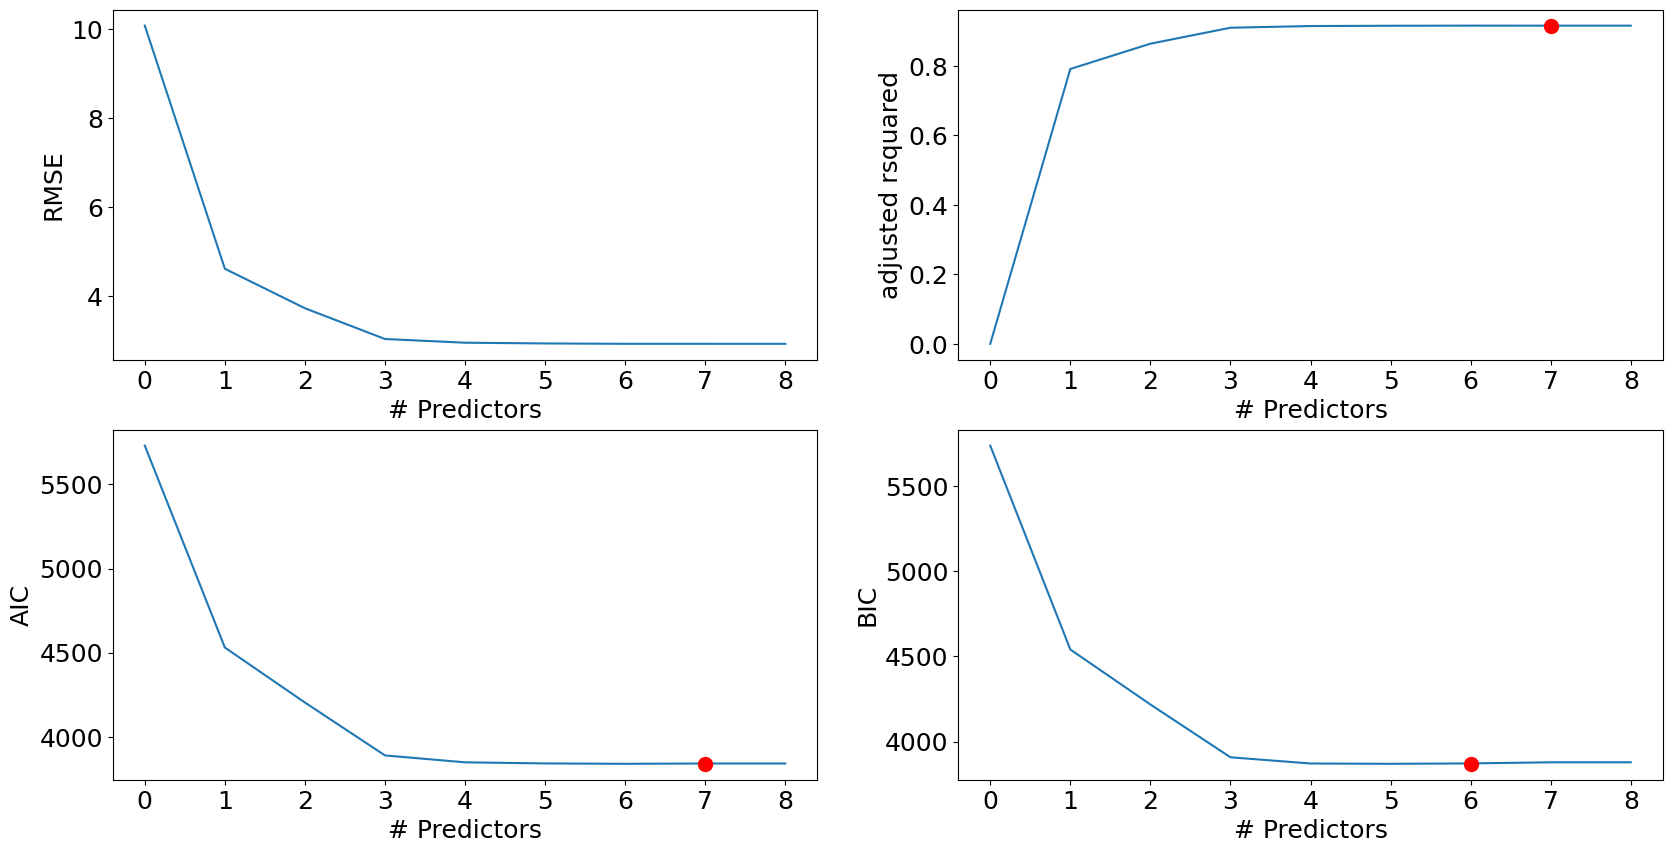

In [79]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
plt.plot(models_best["RMSE"])
plt.xlabel('# Predictors')
plt.ylabel('RMSE')

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector

rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

plt.subplot(2, 2, 2)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.argmax()+1, rsquared_adj.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
aic = models_best.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin()+1, aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

bic = models_best.apply(lambda row: row[1].bic, axis=1)

plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin()+1, bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC')